<a href="https://colab.research.google.com/github/Gasimmmmmmmmmm/Python_Finance_Deep_Learning/blob/main/GRU__Hisse_Senedi_Mum_Grafik_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model oluşturma (GRU versiyonu)

In [ ]:
import os
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")

# Veri çekme ve hazırlama
train_tickers = [
    "AAPL","MSFT","AMZN","GOOGL","META","TSLA","BRK-B","JNJ","V","JPM","WMT","PG","NVDA","MA","UNH","HD","BAC","XOM","CVX",
     ]

def create_sequences(data, window_size=80, horizon=1):
    X, y = [], []
    for i in range(window_size, len(data) - horizon + 1):
        X.append(data[i - window_size:i])
        y.append(data[i + horizon - 1])
    return np.array(X), np.array(y)

window_size = 60
horizon = 1

train_data = []
for ticker in train_tickers:
    df = yf.download(ticker, start="2010-01-01", end="2025-07-30")[["Open", "High", "Low", "Close"]]
    df.dropna(inplace=True)
    train_data.append(df)

scaler = MinMaxScaler()
X_all, y_all = [], []

for df in train_data:
    scaled = scaler.fit_transform(df)
    X, y = create_sequences(scaled, window_size, horizon)
    X_all.append(X)
    y_all.append(y)

X_train = np.concatenate(X_all)
y_train = np.concatenate(y_all)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Epoch 1/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 273s 172ms/step - loss: 0.0035 - val_loss: 1.4035e-04
Epoch 2/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 268s 172ms/step - loss: 7.9606e-05 - val_loss: 1.2988e-04
Epoch 3/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 269s 173ms/step - loss: 6.5019e-05 - val_loss: 9.9719e-05
Epoch 4/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 323s 174ms/step - loss: 6.2457e-05 - val_loss: 1.0788e-04
Epoch 5/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 323s 174ms/step - loss: 5.9146e-05 - val_loss: 1.0025e-04
Epoch 6/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 321s 174ms/step - loss: 5.9467e-05 - val_loss: 2.2551e-04
Epoch 7/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 323s 174ms/step - loss: 5.7808e-05 - val_loss: 1.0586e-04
Epoch 8/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 271s 174ms/step - loss: 5.8719e-05 - val_loss: 1.9712e-04
Epoch 9/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 321s 174ms/step - loss: 5.3605e-05 - val_loss: 9.4105e-05
Epoch 10/30
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 269s 173ms/step - loss: 5.3274e-05 - val_loss: 9.3209e-05
Epo

Model kaydedildi: saved_model/gru_stock_model_8.h5


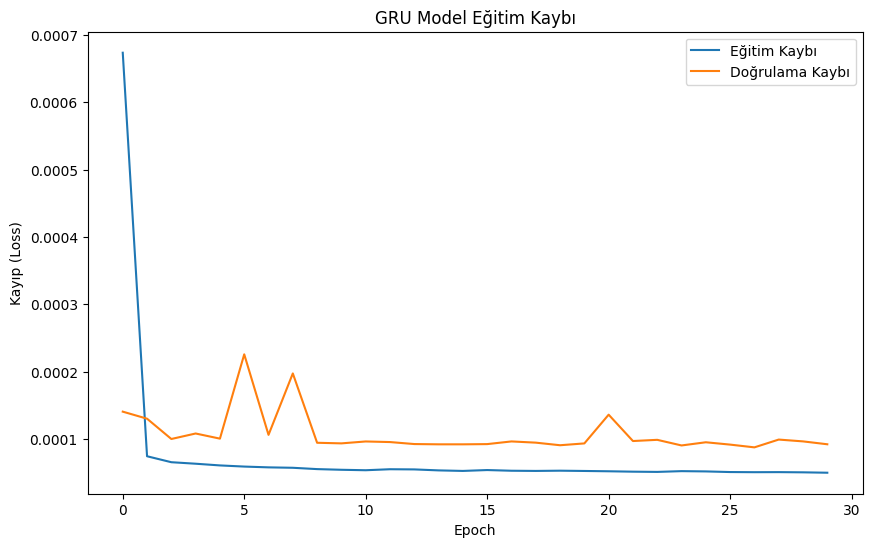

[*********************100%***********************]  1 of 1 completed


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
Test Sonuçları:
Mean Squared Error (MSE): 59.9895
Mean Absolute Error (MAE): 5.4395
R² Score: 0.9904


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import os
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = Sequential([
    GRU(124, activation='relu', return_sequences=True, input_shape=(window_size, 4)),
    GRU(64, activation='relu', return_sequences=True),
    # GRU(16, activation='relu', return_sequences=True),
    GRU(32, activation='relu'),
    Dense(4)
])

optimizer = tf.keras.optimizers.Adamax(
    learning_rate=0.002,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name="adamax",

)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=42,
                    validation_split=0.1,
                    verbose=1)

# Modeli kaydet
model_dir = "saved_model"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "gru_stock_model_8.h5")
model.save(model_path)
print(f"Model kaydedildi: {model_path}")



In [ ]:
# Eğitim kaybı grafiği çizimi
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.title('GRU Model Eğitim Kaybı')
plt.legend()
plt.show()

test_ticker = "TSLA"
test_df = yf.download(test_ticker, start="2020-01-01", end="2025-07-30")[["Open", "High", "Low", "Close"]]
test_df.dropna(inplace=True)

scaler_test = MinMaxScaler()
scaled_test = scaler_test.fit_transform(test_df)

X_test, y_test = create_sequences(scaled_test, window_size, horizon)

# Tahmin yap
y_pred_scaled = model.predict(X_test)
y_pred = scaler_test.inverse_transform(y_pred_scaled)
y_true = scaler_test.inverse_transform(y_test.reshape(-1, y_test.shape[-1]))

# Performans metrikleri
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Test Sonuçları:\nMean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


# Tahmin Sonuçlarının Görselleştirilmesi


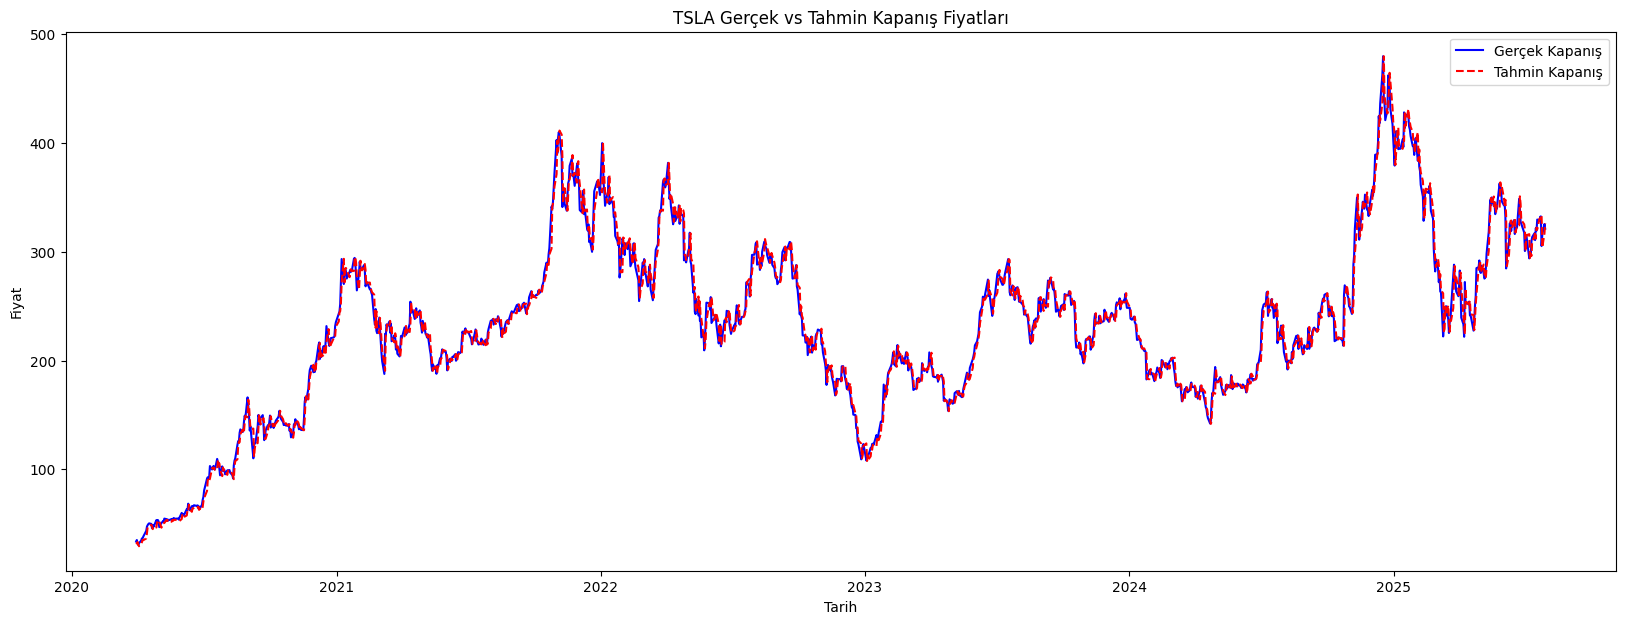

In [4]:
test_dates = test_df.index[window_size + horizon -1:]
plt.figure(figsize=(20, 7))
plt.plot(test_dates[:len(y_true)], y_true[:, 3], label='Gerçek Kapanış', color='blue')
plt.plot(test_dates[:len(y_pred)], y_pred[:, 3], label='Tahmin Kapanış', color='red', linestyle='--')
plt.title(f'{test_ticker} Gerçek vs Tahmin Kapanış Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

# Güven Aralığı Hesablanması


Enter the start date (YYYY-MM-DD): 2022-08-20
Enter the end date (YYYY-MM-DD): 2025-08-04
Standard Deviation of Error (Close): 9.8371
95% Güven Aralığı (Kapanış Tahmin Hatası): [-1.1706, 0.2540]


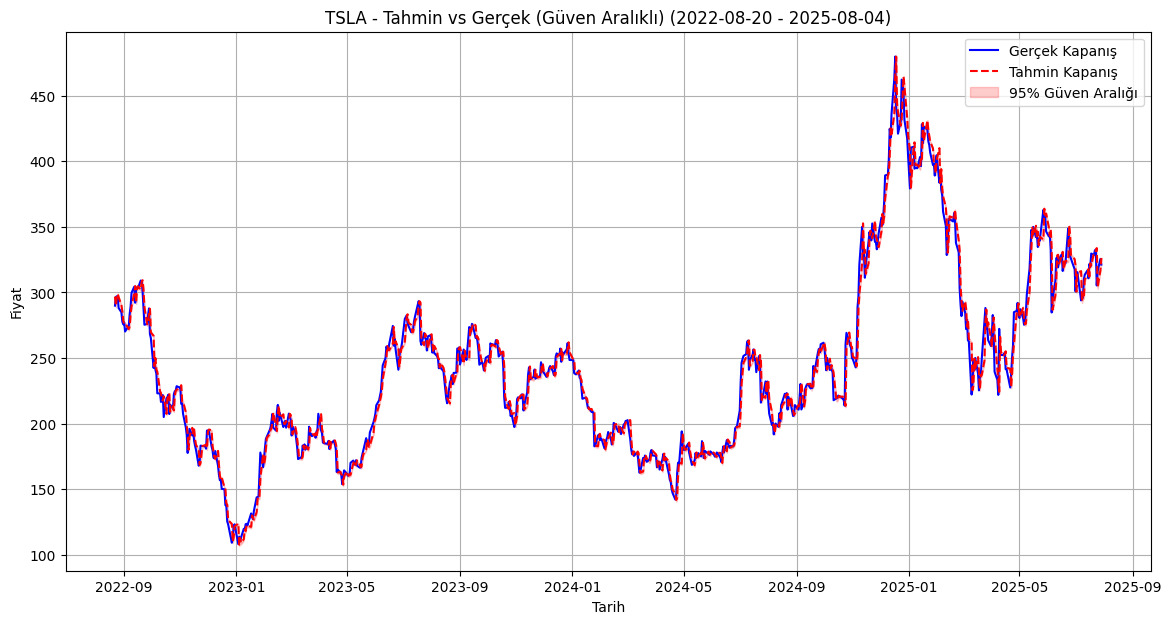

In [6]:
import scipy.stats as st

# Kullanıcıdan tarih aralığı alınır
start_date = pd.to_datetime(input("Enter the start date (YYYY-MM-DD): "))
end_date = pd.to_datetime(input("Enter the end date (YYYY-MM-DD): "))

filtered_mask = (test_dates >= start_date) & (test_dates <= end_date)
filtered_dates = test_dates[filtered_mask]
filtered_y_true = y_true[filtered_mask]
filtered_y_pred = y_pred[filtered_mask]

difference = filtered_y_true[:, 3] - filtered_y_pred[:, 3]

# Standart sapma
std_dev = np.std(difference)
print(f"Standard Deviation of Error (Close): {std_dev:.4f}")

# Güven aralığı (%95)
confidence_level = 0.95
dof = len(difference) - 1
mean_diff = np.mean(difference)
sem = st.sem(difference)
ci = st.t.interval(confidence_level, dof, loc=mean_diff, scale=sem)

print(f"95% Güven Aralığı (Kapanış Tahmin Hatası): [{ci[0]:.4f}, {ci[1]:.4f}]")

# Tahmin kapanış fiyatlarına güven aralığını uygula
lower_bound = filtered_y_pred[:, 3] + ci[0]
upper_bound = filtered_y_pred[:, 3] + ci[1]

plt.figure(figsize=(14, 7))
plt.plot(filtered_dates, filtered_y_true[:, 3], label='Gerçek Kapanış', color='blue')
plt.plot(filtered_dates, filtered_y_pred[:, 3], label='Tahmin Kapanış', color='red', linestyle='--')
plt.fill_between(filtered_dates, lower_bound, upper_bound, color='red', alpha=0.2, label='95% Güven Aralığı')
plt.title(f"{test_ticker} - Tahmin vs Gerçek (Güven Aralıklı) ({start_date.date()} - {end_date.date()})")
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()


# Tahmin Mum Grafiği


In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import pandas.tseries.offsets as offsets
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

model_path = "saved_model/gru_stock_model_8.h5"
model = load_model(model_path, custom_objects={'mse': MeanSquaredError()})

test_ticker = "NVDA"
start_date = "2025-05-28"
end_date = "2025-08-30"
df_test = yf.download(test_ticker, start=start_date, end=end_date)[["Open", "High", "Low", "Close"]]
df_test.dropna(inplace=True)

scaler = MinMaxScaler()
scaled_test = scaler.fit_transform(df_test)

# Son 60 günü al
window_size = 60
X_input = scaled_test[-window_size:]
X_input = np.expand_dims(X_input, axis=0)

# Bir gün sonrası Model tahmini
pred_scaled = model.predict(X_input)
predicted_ohlcv = scaler.inverse_transform(pred_scaled)[0]

dates_real = df_test.index[-window_size:]
next_business_day = dates_real[-1] + offsets.BDay(1)
dates_all = dates_real.append(pd.Index([next_business_day]))

open_vals = np.append(df_test['Open'][-window_size:].values, predicted_ohlcv[0])
high_vals = np.append(df_test['High'][-window_size:].values, predicted_ohlcv[1])
low_vals = np.append(df_test['Low'][-window_size:].values, predicted_ohlcv[2])
close_vals = np.append(df_test['Close'][-window_size:].values, predicted_ohlcv[3])

fig = go.Figure(data=[go.Candlestick(
    x=dates_all,
    open=open_vals,
    high=high_vals,
    low=low_vals,
    close=close_vals,
    increasing_line_color='green',
    decreasing_line_color='red',
)])

fig.add_trace(go.Scatter(
    x=[next_business_day],
    y=[predicted_ohlcv[1]],
    text=["Tahmin"],
    mode="text",
    showlegend=False,
    textposition="top center",
    textfont=dict(color="blue", size=14, family="Arial")
))

# Tahmin mum için bilgi kutusu
annotation_text = (
    f"Open: {predicted_ohlcv[0]:.2f}<br>"
    f"High: {predicted_ohlcv[1]:.2f}<br>"
    f"Low: {predicted_ohlcv[2]:.2f}<br>"
    f"Close: {predicted_ohlcv[3]:.2f}<br>"
)

fig.add_annotation(
    x=next_business_day,
    y=predicted_ohlcv[1],
    text=annotation_text,
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-100,
    bgcolor="lightblue",
    bordercolor="blue",
    borderwidth=1,
    borderpad=4,
    font=dict(color="blue", size=12)
)

fig.update_layout(
    title=f"{test_ticker} - Son {window_size} Gün Gerçek ve {next_business_day.date()} Tahmini Mum Grafiği",
    xaxis_title="Tarih",
    yaxis_title="Fiyat",
    xaxis_rangeslider_visible=False
)

fig.show()

[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


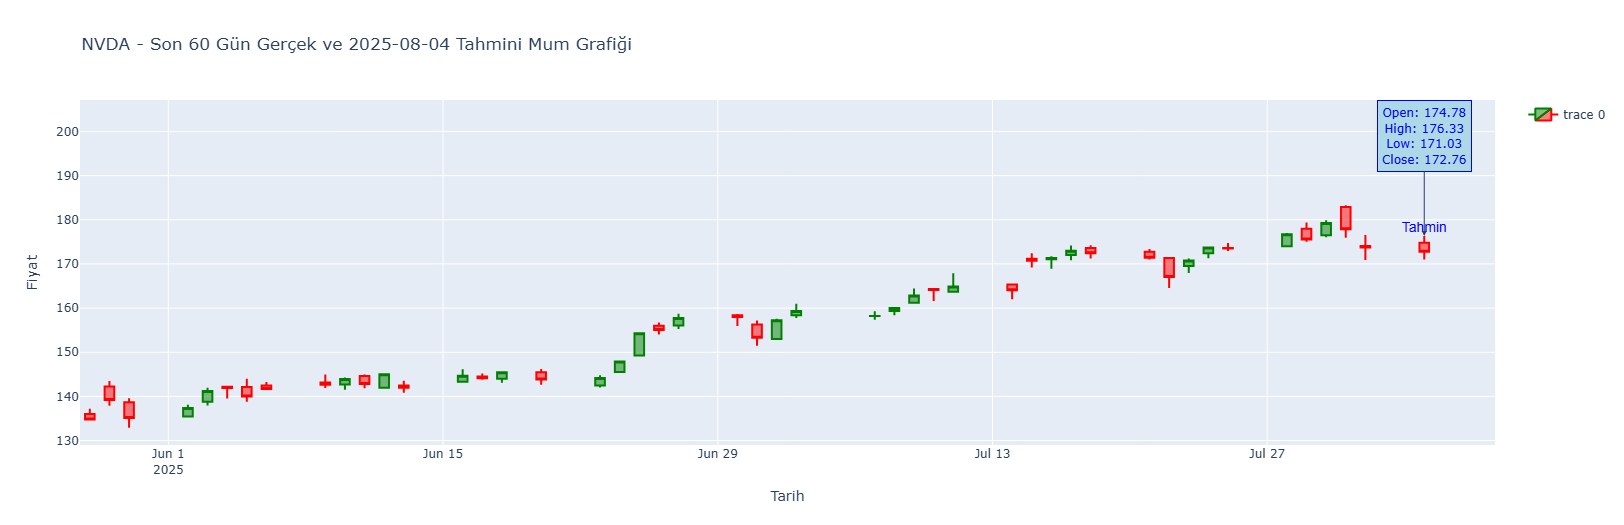

In [20]:
from IPython.display import Image, display
import os

image_path = '/content/newplot.png'

if os.path.exists(image_path):
    display(Image(filename=image_path))
else:
    print(f"Error: {image_path}")